In [70]:
# import libraries 
import json
import networkx as nx
import numpy as np
import os
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as app
from scipy.stats import pearsonr
import seaborn as sns
import pylab
from scipy.stats import mannwhitneyu
import datetime
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.api as sm
from itertools import chain
import sys
import inspect
# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

# import local scripts
import src.classes_analysis as simulation
import src.models as model
import src.graph as graph
import src.interventions as interventions


%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
# calculate the desired interventions and get the intervention differences
df_diffusion,_,graph,_ = simulation.get_classes_intervention_results()

Generating Graph...
###############################################################
Graph generation starting!
Label: gen
Formula: None
###############################################################

Nodes removed for not being in the selected classes: # 454
###############################################################
Graph generated successfuly!
###############################################################

454.10472869873047


/Users/bojansimoski/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/bojansimoski/dev/eur/ABM-PA/src/classes_analysis.py:657: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_rates['perc_sni']=success_rates.iloc[:, [1,2,3]

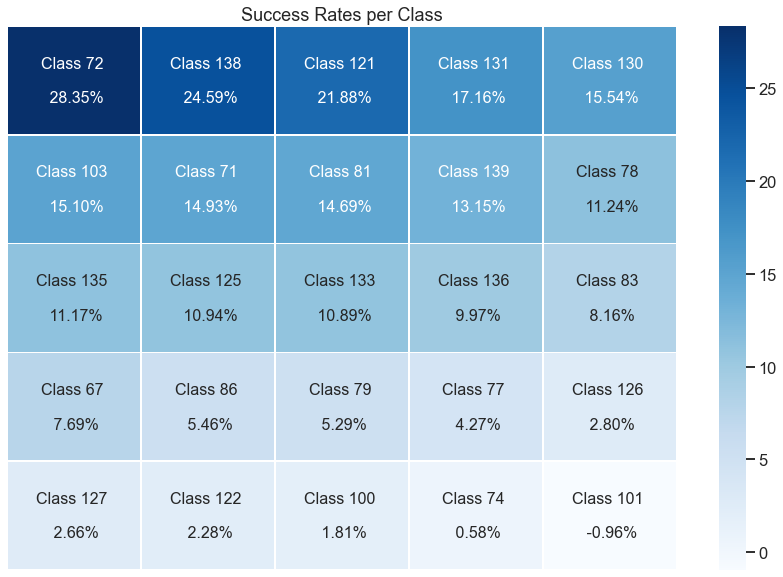

,ID,perc_indegree,perc_betweenness,perc_closeness,perc_random,perc_nointervention,perc_sni
19,129,-5.88,-5.88,-5.88,-5.9,-5.88,-5.88
12,101,-0.96,-0.96,-0.96,-0.7,-0.96,-0.96
4,74,0.58,0.58,0.58,-0.04,0.58,0.58
11,100,1.81,1.81,1.81,2.99,1.81,1.81
15,122,2.28,2.28,2.28,2.42,2.28,2.28
18,127,2.66,2.66,2.66,2.14,2.66,2.66
17,126,2.8,2.8,2.8,3.63,2.8,2.80
5,77,4.27,4.27,4.27,4.89,4.27,4.27
7,79,5.29,5.29,5.29,4.56,5.29,5.29
10,86,5.46,5.46,5.46,5.14,5.46,5.46


In [79]:
indif, success_rates=simulation.get_interventions_differences(class_dict=df_diffusion)
simulation.fancy_heatmap(success_rates)
success_rates.loc['avg'] = success_rates.mean()
simulation.df_to_excel(success_rates,filename='successrates.xlsx',sheet='SuccessRates')
success_rates

In [85]:
success_rates

,ID,perc_indegree,perc_betweenness,perc_closeness,perc_random,perc_nointervention,perc_sni
19,129,-5.88,-5.88,-5.88,-5.9,-5.88,-5.88
12,101,-0.96,-0.96,-0.96,-0.7,-0.96,-0.96
4,74,0.58,0.58,0.58,-0.04,0.58,0.58
11,100,1.81,1.81,1.81,2.99,1.81,1.81
15,122,2.28,2.28,2.28,2.42,2.28,2.28
18,127,2.66,2.66,2.66,2.14,2.66,2.66
17,126,2.8,2.8,2.8,3.63,2.8,2.80
5,77,4.27,4.27,4.27,4.89,4.27,4.27
7,79,5.29,5.29,5.29,4.56,5.29,5.29
10,86,5.46,5.46,5.46,5.14,5.46,5.46


In [80]:
indif.head()

,ID,networkType,percent,model,optimized,d0_optimized,d364_optimized,outdegree,d0_outdegree,d364_outdegree,...,e_vulnerability,s_random,e_random,noint,perc_nointervention,perc_outdegree,perc_indegree,perc_closeness,perc_betweenness,perc_random
1,67,gen,15,diffusion,,,,0.122059,1.587739,1.709798,...,,,,7.69,7.69,7.69,7.69,7.69,7.69,7.76
2,71,gen,15,diffusion,,,,0.21494,1.439917,1.654857,...,,,,14.93,14.93,14.93,14.93,14.93,14.93,14.95
3,72,gen,15,diffusion,,,,0.444679,1.568442,2.013121,...,,,,28.35,28.35,28.35,28.35,28.35,28.35,27.66
4,74,gen,15,diffusion,,,,0.008541,1.475956,1.484497,...,,,,0.58,0.58,0.58,0.58,0.58,0.58,-0.04
5,77,gen,15,diffusion,,,,0.076358,1.789333,1.865692,...,,,,4.27,4.27,4.27,4.27,4.27,4.27,4.89


In [81]:
graph

In [40]:
# get_class_graphs(graph,writeToFile=True,label='gen')

In [82]:
for sg in graph:
    simulation.get_class_graphs(graph=sg)

In [ ]:
# simulation.get_intervention_per_child_plots(classes_results=df_diffusion)

create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****


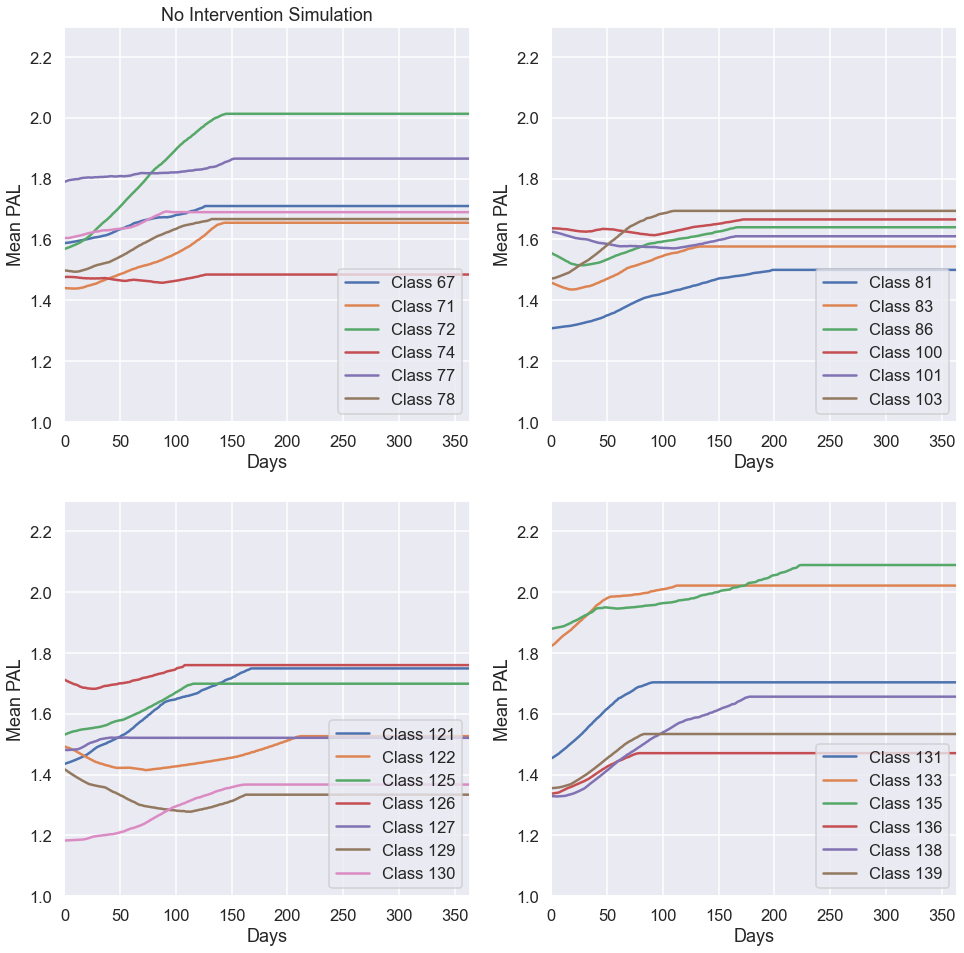

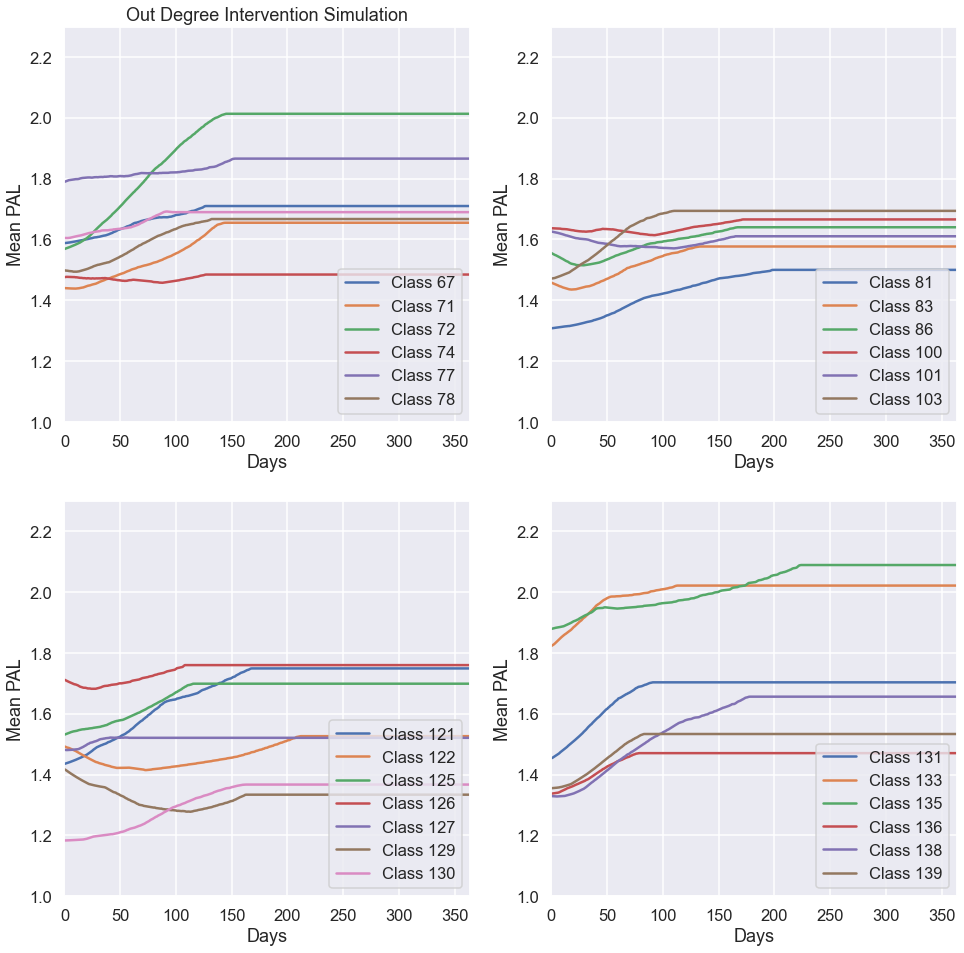

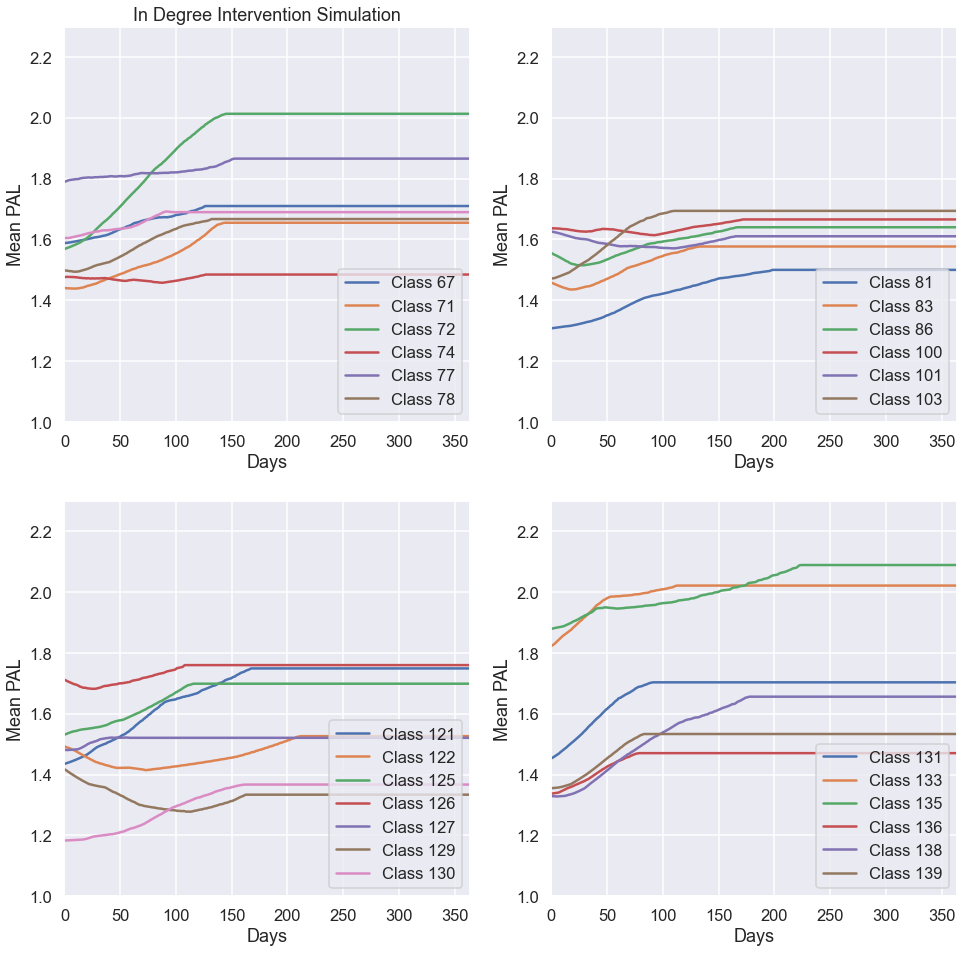

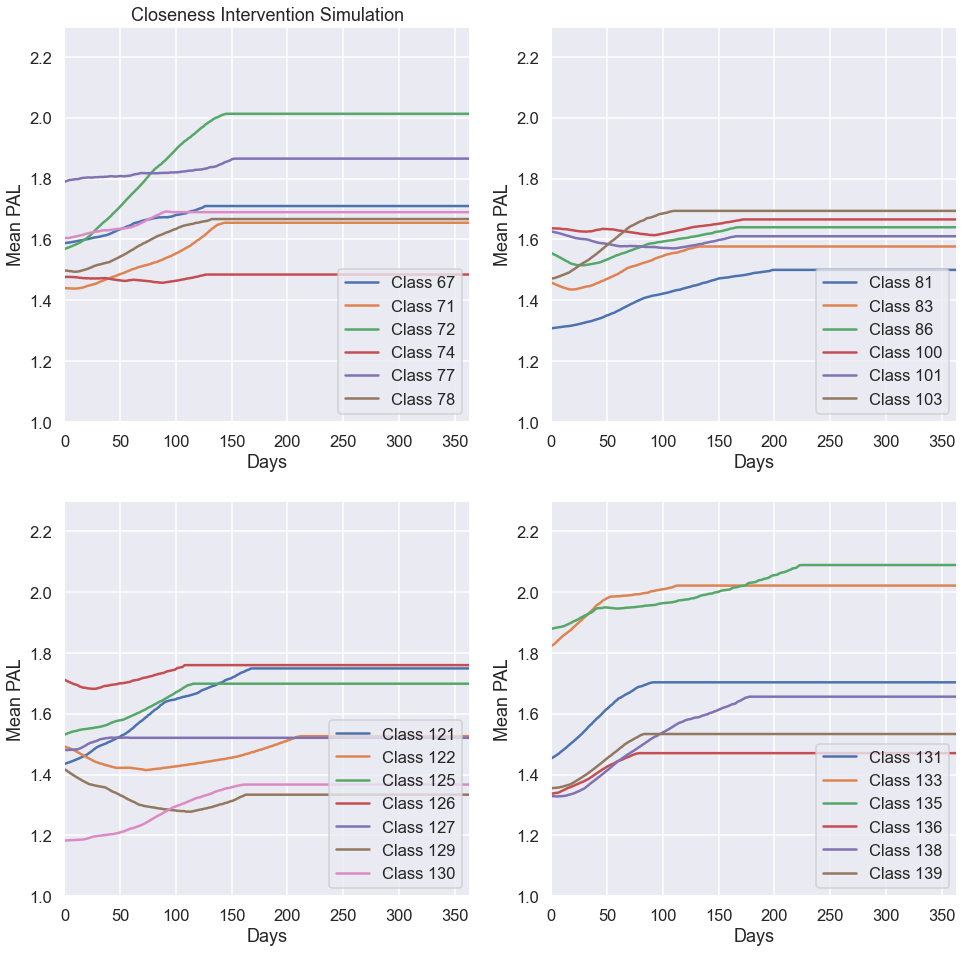

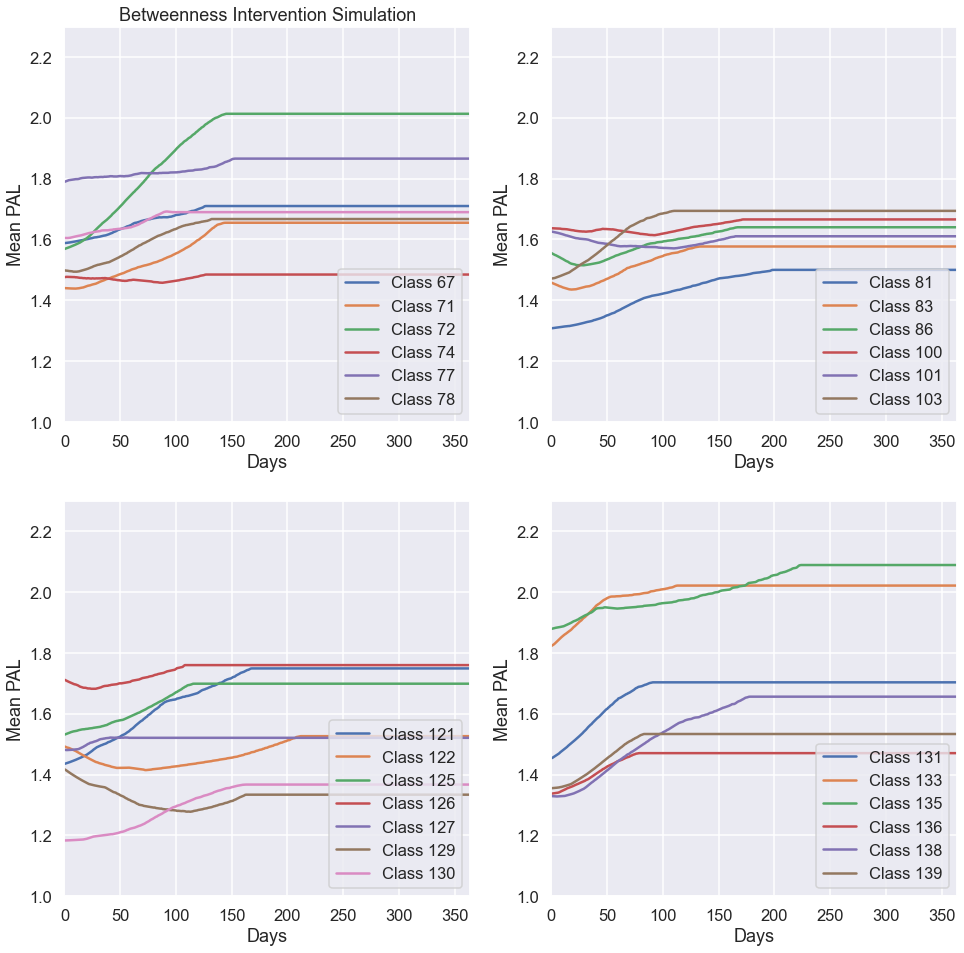

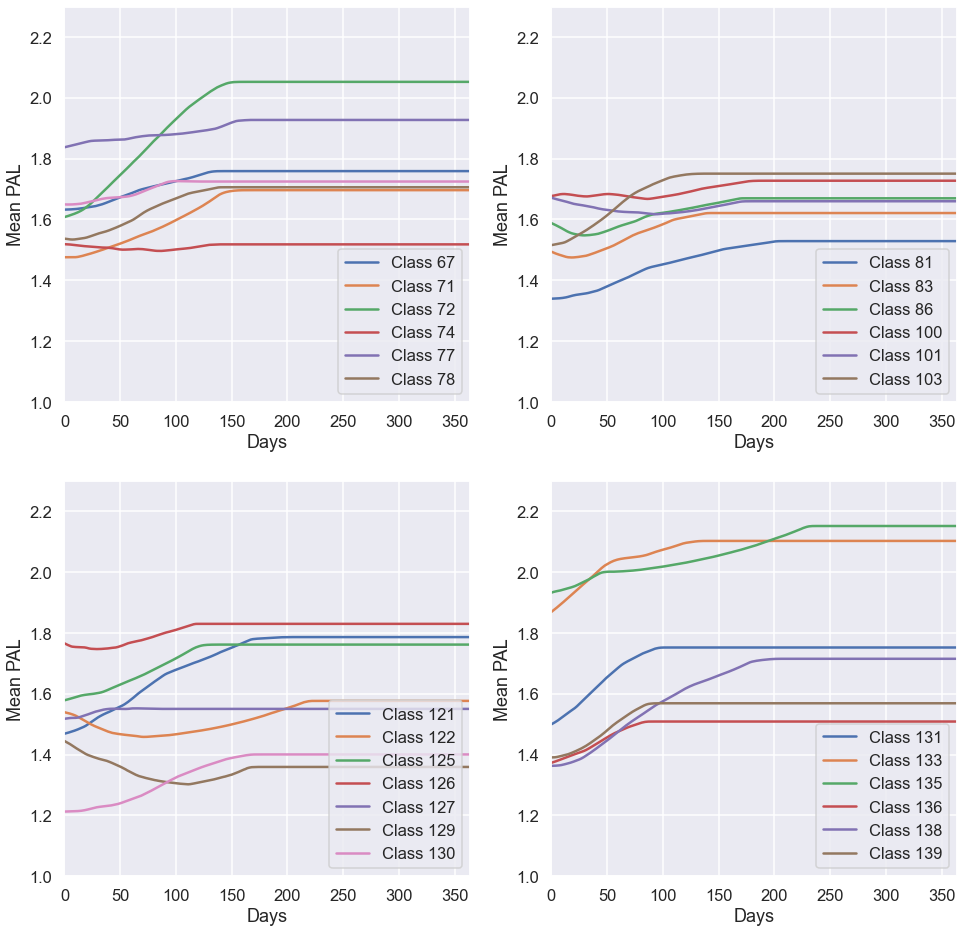

In [83]:
simulation.get_classes_intervention_comparison_plots(classes_results=df_diffusion)

In [107]:
# simulation.get_all_interventions_per_model_plots(classes_results=df_diffusion)

<AxesSubplot:>

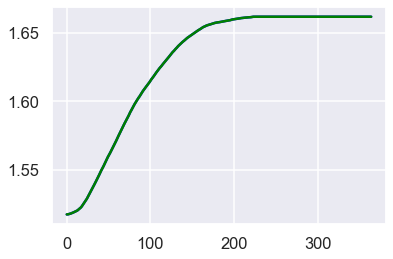

In [106]:
indegree.plot(color='blue',label='indegree')

betweenness.plot(color='green',label='betweenness')



Avg Success Rates Interventions
9.51 closeness
9.51 indegree
9.51 outdegree
9.51 nointervention


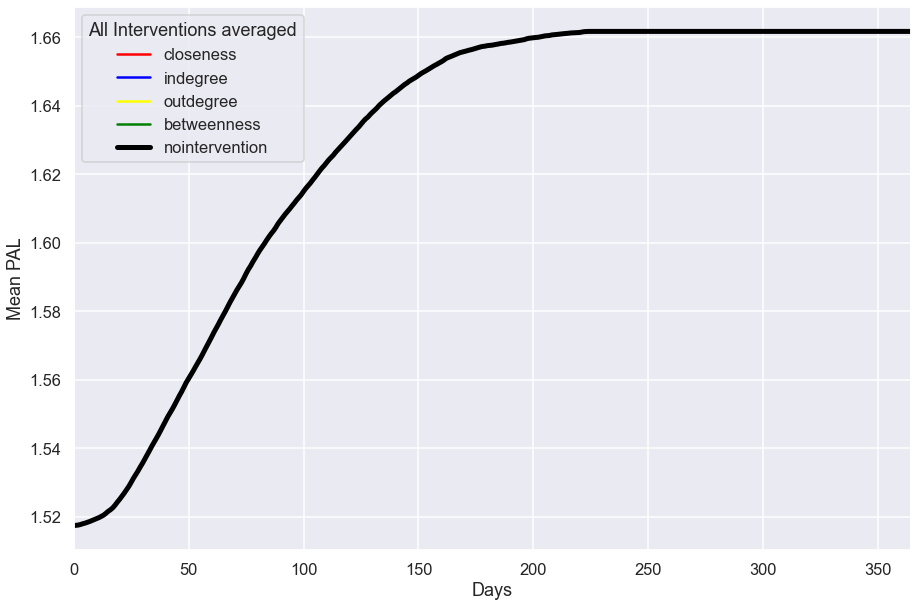

In [111]:
closeness=df_diffusion[0]['diffusion']['closeness']['gen'][15].mean(axis=1)
indegree=df_diffusion[0]['diffusion']['indegree']['gen'][15].mean(axis=1)
outdegree=df_diffusion[0]['diffusion']['outdegree']['gen'][15].mean(axis=1)
betweenness=df_diffusion[0]['diffusion']['betweenness']['gen'][15].mean(axis=1)
# maxpal=df_diffusion[0]['diffusion']['maxpal']['gen'][15].mean(axis=1)
# minpal=df_diffusion[0]['diffusion']['minpal']['gen'][15].mean(axis=1)
nointervention=df_diffusion[0]['diffusion']['nointervention']['gen'][15].mean(axis=1)
random=df_diffusion[0]['diffusion']['random']['gen'][15].mean(axis=1)
for i in range(1,26):
    closeness=closeness.add(df_diffusion[i]['diffusion']['closeness']['gen'][15].mean(axis=1))
    indegree=indegree.add(df_diffusion[i]['diffusion']['indegree']['gen'][15].mean(axis=1))
    outdegree=outdegree.add(df_diffusion[i]['diffusion']['outdegree']['gen'][15].mean(axis=1))
    betweenness=betweenness.add(df_diffusion[i]['diffusion']['betweenness']['gen'][15].mean(axis=1))
#     maxpal=maxpal.add(df_diffusion[i]['diffusion']['maxpal']['gen'][15].mean(axis=1))
#     minpal=minpal.add(df_diffusion[i]['diffusion']['minpal']['gen'][15].mean(axis=1))
    nointervention=nointervention.add(df_diffusion[i]['diffusion']['nointervention']['gen'][15].mean(axis=1))
    random=random.add(df_diffusion[i]['diffusion']['random']['gen'][15].mean(axis=1))

writer = pd.ExcelWriter('AveragedOutput.xlsx')
closeness=closeness/26
closeness.to_excel(writer,'closeness')
indegree=indegree/26
indegree.to_excel(writer,'indegree')
outdegree=outdegree/26
outdegree.to_excel(writer,'outdegree')
betweenness=betweenness/26
betweenness.to_excel(writer,'betweenness')
# maxpal=maxpal/26
# maxpal.to_excel(writer,'maxpal')
# minpal=minpal/26
# minpal.to_excel(writer,'minpal')
nointervention=nointervention/26
nointervention.to_excel(writer,'nointervention')
random=random/26
random.to_excel(writer,'random')
writer.save()

plt.figure(figsize=((15,10)))
plt.xlim(0,364)
plt.xlabel('Days')
plt.ylabel('Mean PAL')
closeness.plot(color='red',label='closeness')
indegree.plot(color='blue',label='indegree')
outdegree.plot(color='yellow',label='outdegree')
betweenness.plot(color='green',label='betweenness')
# maxpal.plot(color='purple',label='maxpal')
# minpal.plot(color='orange',label='minpal')
nointervention.plot(style='-', linewidth=5, color='black',label='nointervention')
# random.plot(color='pink',label='random')
plt.legend(title='All Interventions averaged' )
print('Avg Success Rates Interventions')
print(repr(simulation.get_change(closeness[364],closeness[0]))+' closeness')
print(repr(simulation.get_change(indegree[364],indegree[0]))+' indegree')
print(repr(simulation.get_change(outdegree[364],outdegree[0]))+' outdegree')
# print(repr(simulation.get_change(betweenness[364],betweenness[0]))+' betweenness')
# print(repr(simulation.get_change(maxpal[364],maxpal[0]))+' maxpal')
# print(repr(simulation.get_change(minpal[364],minpal[0]))+' minpal')
print(repr(simulation.get_change(nointervention[364],nointervention[0]))+' nointervention')

In [63]:
simulation.writeClassesInterventionToExcel(classes_results=df_diffusion)

In [67]:
# corr,pval,stats=simulation.get_correlations(dct=df_diffusion,model='diffusion')

In [48]:
# x=stats[['ROutDegreeCentralization']].values
# y=stats[['diffusion_vulnerability']].values
# plt.scatter(x,y)
# plt.xlabel("OutDegree Centralization")
# plt.ylabel("Vulnerability - Diffusion")

In [49]:
# df_to_excel(corr.round(2),filename='Correlations.xlsx',sheet='Correlations')

In [50]:
# df_to_excel(pval.round(3),filename='PVals.xlsx',sheet='PVals')

In [51]:
# start_points=indif[['ID','d0_outdegree','d0_indegree','d0_betweenness','d0_closeness','d0_nointervention','d0_maxpal']]

In [52]:
# start_points=start_points.sort_values('d0_nointervention')

In [53]:
# start_points=start_points.astype(float).round(2)

In [54]:
# end_points=indif[['ID','d364_outdegree','d364_indegree','d364_betweenness','d364_closeness','d364_nointervention','d364_maxpal']]

In [55]:
# end_points=end_points.sort_values('d364_nointervention')

In [68]:
# df_to_excel(start_points,filename='start_points.xlsx',sheet='start_points')

In [ ]:
# get_classes_intervention_comparison_plots(classes_results=df_diffusion,save_png=True, create_doc=True,model=['diffusion'],label=['gen'],percent=[20])

In [ ]:
# xls_file = pd.ExcelFile('Results/ClassesSummary/networkanalysis_gen_final.xlsx')
# net = xls_file.parse('Class')

In [ ]:
# net[['ID','RClosenessCentralization']].sort_values('RClosenessCentralization')

In [ ]:
# indif

In [ ]:
# corr.round(2)

In [ ]:
# pval.round(3)

In [ ]:
#         x=stats[['ROutDegreeCentralization']].values
#         y=stats[['diffusion_vulnerability']].values
#         df = pd.DataFrame()
#         x=list(chain.from_iterable(x.tolist()))
#         y=list(chain.from_iterable(y.tolist()))
#         df['Out Degree Centralization']=x
#         df['Vulnerability']=y

In [ ]:
# g = sns.jointplot("Out Degree Centralization", "Vulnerability", data=df, kind="reg", size=8)

In [ ]:
# x=stats[['ROutDegreeCentralization']].values
# y=stats[['diffusion_noint']].values
# df = pd.DataFrame()
# x=list(chain.from_iterable(x.tolist()))
# y=list(chain.from_iterable(y.tolist()))
# df['Out Degree Centralization']=x
# df['No Intervention']=y
# g = sns.jointplot("Out Degree Centralization", "No Intervention", data=df, kind="reg", size=8)

In [ ]:
# # heatmap stuff
# hm=success_rates[['ID','perc_total']].sort_values('perc_total',ascending=False)

In [ ]:
# hm=hm.drop(hm.index[len(hm)-1])

In [ ]:
# df_to_excel(hm,filename='heatmap.xlsx',sheet='heatmap')

In [ ]:
# hm=pd.ExcelFile('heatmap.xlsx',sheet_name='heatmap')
# hm=hm.parse('heatmap')

In [ ]:
# hm

In [ ]:
# # hm=success_rates[['ID','perc_total']].sort_values('perc_total',ascending=False)
# # hm=hm.drop(hm.index[12])
# # df_to_excel(hm,filename='heatmap.xlsx',sheet='heatmap')
# hm=pd.ExcelFile('heatmap.xlsx',sheet_name='heatmap')
# hm=hm.parse('heatmap')
# hm=hm.reset_index()
# cls=(np.asarray(hm['ID'])).reshape(5,5)
# perc=(np.asarray(hm['perc_total'])).reshape(5,5)
# result=hm.pivot(index='Yrows',columns='Xrows',values='perc_total')
# labels=(np.asarray(["Class {0} \n \n {1:.2f}%".format(c,p)
#                   for c,p in zip(cls.flatten(),perc.flatten())])
#        ).reshape(5,5)
# fig, ax =plt.subplots(figsize=(15,10))
# title= "Success Rates per Class"
# plt.title(title,fontsize=18)
# ttl=ax.title
# ttl.set_position([0.5,1.05])
# ax.set_xticks([])
# ax.set_yticks([])
# ax.axis('off')
# sns.heatmap(result,annot=labels,annot_kws={"size": 16},fmt="",cmap="Blues",linewidths=0.30,ax=ax)
# plt.show()

In [ ]:
# result

In [ ]:
# cls

In [ ]:
# perc

In [ ]:
# result=hm.pivot(index='Yrows',columns='Xrows',values='perc_total')

In [ ]:
# result

In [ ]:
# labels=(np.asarray(["Class {0} \n \n {1:.2f}%".format(c,p)
#                   for c,p in zip(cls.flatten(),perc.flatten())])
#        ).reshape(5,5)

In [ ]:
# labels

In [ ]:
# # heatmap stuff
# hm=success_rates[['ID','perc_total']].sort_values('perc_total',ascending=False)
# hm=hm.drop(hm.index[len(hm)-1])
# df_to_excel(hm,filename='heatmap.xlsx',sheet='heatmap')
# hm=pd.ExcelFile('heatmap.xlsx',sheet_name='heatmap')
# hm=hm.parse('heatmap')
# cls=(np.asarray(hm['ID'])).reshape(5,5)
# perc=(np.asarray(hm['perc_total'])).reshape(5,5)
# result=hm.pivot(index='Yrows',columns='Xrows',values='perc_total')
# labels=(np.asarray(["Class {0} \n \n {1:.2f}%".format(c,p)
#                   for c,p in zip(cls.flatten(),perc.flatten())])
#        ).reshape(5,5)
# fig, ax =plt.subplots(figsize=(15,10))
# title= "Success Rates per Class"
# plt.title(title,fontsize=18)
# ttl=ax.title
# ttl.set_position([0.5,1.05])
# ax.set_xticks([])
# ax.set_yticks([])
# ax.axis('off')
# sns.heatmap(result,annot=labels,annot_kws={"size": 16},fmt="",cmap="Blues",linewidths=0.30,ax=ax)
# plt.show()

In [ ]:
# hm=success_rates[['ID','perc_total']].sort_values('perc_total',ascending=False)

In [ ]:
# hm

In [ ]:
# get_classes_intervention_comparison_plots(classes_results=df_diffusion,model=['diffusion'], label=['gen'], percent=[20], intervention=['centrality', 'high_risk', 'vulnerability'])

In [ ]:
# x=stats[['ROutDegreeCentralization']].values
# y=stats[['diffusion_high_risk']].values
# df = pd.DataFrame()
# x=list(chain.from_iterable(x.tolist()))
# y=list(chain.from_iterable(y.tolist()))
# df['Out Degree Centralization']=x
# df['High Risk Intervention']=y
# sns.set_style("white")
# sns.set_context("talk", font_scale=1.2,rc={"lines.linewidth": 2.5})
# g = sns.jointplot("Out Degree Centralization", "High Risk Intervention", data=df, kind="reg", size=8)
# g.savefig('myimage.png', format='png', dpi=1200)

In [ ]:
# graphGen

In [ ]:
# get_class_graphs(graph=graphGen,writeToFile=True)

In [ ]:
# get_df_class_children_topology_analysis(graphGen=[graphGen],generateGephiFiles=True)

In [ ]:
# df_diffusion

In [ ]:
# nx.draw(testGraph)
# plt.show()

In [ ]:
# diffuse_behavior_PA(testGraph)